In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, TimeDistributed
import model

tf.__version__

'2.3.0'

In [2]:
def generateArma(
    n,
    obsCoef,
    noiseCoef,
    noiseGenFunc,
    noiseGenParams,
    obsFunc = None,
    noiseFunc = None
):

    p = len(obsCoef)
    q = len(noiseCoef)    
    
    x = np.zeros(n)
    eps = np.zeros(n)

    for t in range(n):

        obsVal = 0
        for i in range(min(t, p)):
            obsVal += obsCoef[i] * x[t - i - 1]
        
        if obsFunc is not None:
            obsVal = obsFunc(obsVal)
        x[t] += obsVal
        
        noiseVal = 0
        for j in range(min(t, q)):
            noiseVal += noiseCoef[j] * eps[t - j - 1]

        if noiseFunc is not None:
            noiseVal = noiseFunc(noiseVal)
        x[t] += noiseVal

        eps[t] = noiseGenFunc(*noiseGenParams)
        x[t] += eps[t]

    return x

In [3]:
n = 10000
P = 50
Q = 50

In [4]:
obsCoef = np.concatenate([
    np.random.uniform(-0.1, 0, size = P // 2),
    np.random.uniform(0, 0.1, size = P // 2)
])

noiseCoef = np.concatenate([
    np.random.uniform(-0.01, 0, size = Q // 2),
    np.random.uniform(0, 0.01, size = Q // 2)
])

noiseGenFunc = np.random.normal
noiseGenParams = (1.0, 1.0)

In [5]:
trainSeq = generateArma(n, obsCoef, noiseCoef, noiseGenFunc, noiseGenParams)

Plotting Sequence


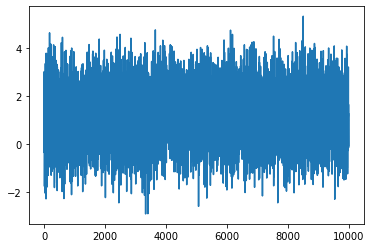

In [6]:
print('Plotting Sequence')
plt.plot(trainSeq)
plt.show()

In [7]:
x = trainSeq[:n-1, np.newaxis]
y = trainSeq[1:, np.newaxis]

In [8]:
timeModel = model.Model(
    memorySize = 80,
    windowSize = 5,
    threshold = 20,
    inputDimension = 1,
    hiddenStateSize = 20,
    extremeValueIndex = 3.0,
    optimizer = tf.keras.optimizers.Adam(),
    extremeLossWeight = 2.0
)

In [9]:
timeModel.train(x, y, 200, verbose = 2, modelFilepath = 'trainModel.model')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

start timestep: 6 | end timestep: 205  | time taken:  100.23 sec | Loss: 149782.25
start timestep: 206 | end timestep: 405  | time taken:  99.67 sec | Loss: 176140.890625
start timestep: 406 | end timestep: 605  | time taken:  98.90 sec | Loss: 164940.6875
start timestep: 606 | end timestep: 805  | time taken:  100.00 sec | Loss: 143640.3125
start timestep: 806 | end timestep: 1005  | time taken:  100.57 sec | Loss: 144593.96875
start timestep: 1006 | end timestep: 1205  | time taken:  99.67 sec | Loss:

In [16]:
yPred = timeModel.predict(x[400:420])

In [17]:
yTrue = y[400:420]

In [18]:
np.set_printoptions(suppress=True)
print(np.expand_dims(yPred, axis = 1))

[[ 0.19875616]
 [ 0.3704685 ]
 [ 0.4343448 ]
 [ 0.2746786 ]
 [ 0.39846024]
 [ 0.6327278 ]
 [ 1.0085325 ]
 [ 0.84799105]
 [ 0.41541874]
 [ 0.60231555]
 [ 0.25687793]
 [ 0.16780975]
 [-0.01984119]
 [ 0.24245232]
 [ 0.98098016]
 [ 1.0702744 ]
 [ 0.54080003]
 [ 0.29071614]
 [ 0.7398588 ]
 [ 1.1387651 ]]


In [19]:
print(yTrue)

[[ 0.79311992]
 [ 0.80016809]
 [-0.21179579]
 [ 0.86904951]
 [ 1.72273901]
 [ 2.91383496]
 [ 2.08523125]
 [ 0.33199106]
 [ 1.90622145]
 [-0.32367736]
 [-0.12735837]
 [-1.62080791]
 [ 0.62414647]
 [ 2.99920644]
 [ 2.63154157]
 [ 0.37759609]
 [ 0.00142273]
 [ 2.41812326]
 [ 3.31712519]
 [ 2.34294   ]]
